import dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

data collection and analysis

PIMA diabetes dataset

In [5]:
# loading the dataset to a pandas dataframe
diabetes_dataset = pd.read_csv(r'C:\Users\bkavy\Downloads\diabetes.csv')

In [6]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


replacing zeroes with medians of the column

In [9]:
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_dataset[column] = diabetes_dataset[column].replace(0, np.nan)
    diabetes_dataset[column].fillna(diabetes_dataset[column].median(), inplace=True)

C:\Users\bkavy\AppData\Local\Temp\ipykernel_19748\1053646558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_dataset[column].fillna(diabetes_dataset[column].median(), inplace=True)
C:\Users\bkavy\AppData\Local\Temp\ipykernel_19748\1053646558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [10]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


Visualizing with Histograms

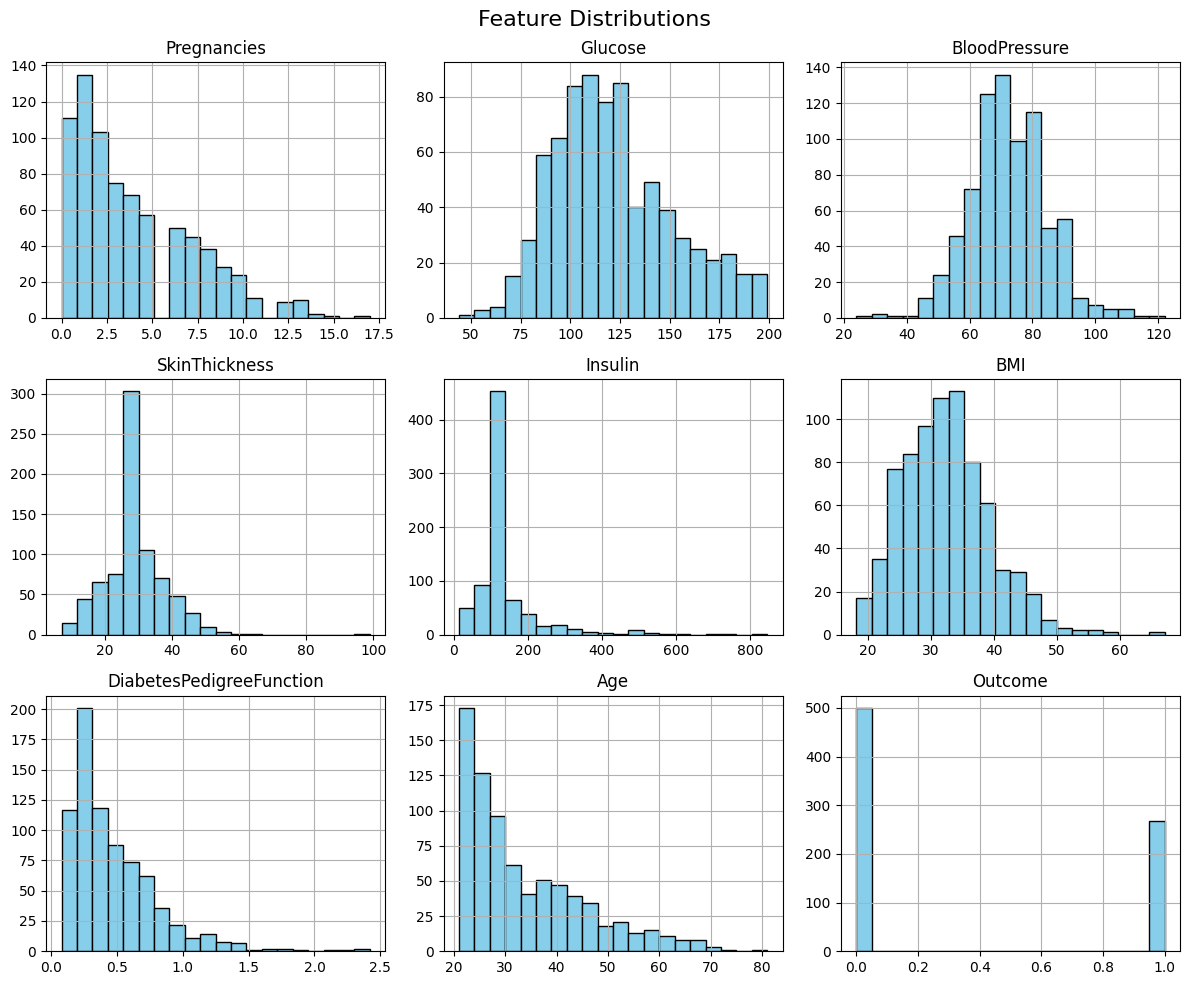

In [13]:
diabetes_dataset.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

Correlation map

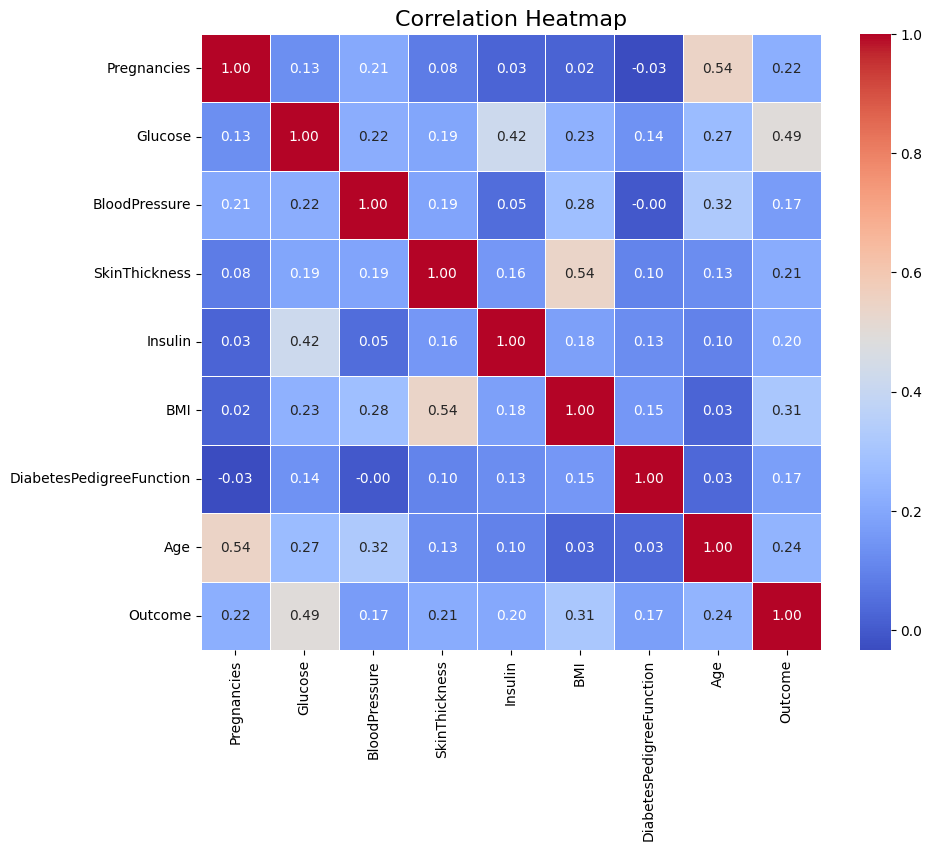

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

seperating the data and the labels

In [15]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


standardizing the data

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [20]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


splitiing data into training data and testing data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


training the ML model

In [26]:
classifier = svm.SVC(kernel='linear')

In [27]:
# training the support vector machine  classifier
classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Evaluating the model

Accuracy score

In [28]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7801302931596091


In [30]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


Making a predictive system

In [32]:
input_data = (1,92,72,20,80,23,0.3,28)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[-0.84488505 -0.97494243 -0.03198993 -1.03671702 -0.7028162  -1.37616389
  -0.51908683 -0.44593516]]
[0]
The person is not diabetic


c:\Users\bkavy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
import joblib

In [35]:
joblib.dump(classifier, 'diabetes_dataset.pkl')

['diabetes_dataset.pkl']

In [36]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']